<a href="https://colab.research.google.com/github/Daysiday/Daysiday/blob/main/Copia_de_Modulo_3_Tema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tema 1: Introducción a los Conjuntos de Datos**

# 📌 **Sección 1: Introducción a los tipos de datasets en visión artificial**

En esta sección explicaremos los tres tipos principales de datasets:
- **Clasificación**: Cada imagen tiene una sola etiqueta asociada.
- **Detección de objetos**: Cada imagen tiene múltiples objetos con coordenadas de ubicación.
- **Segmentación**: Se identifican píxeles específicos que pertenecen a cada objeto.

# 📌 **Sección 2: Exploración de un dataset de Clasificación (CIFAR-10)**



📌 Paso 1: Cargar y Guardar el Dataset CIFAR-10

💡 Explicación:

CIFAR-10 está incluido en TensorFlow/Keras, así que podemos cargarlo fácilmente con tf.keras.datasets.cifar10.load_data().
Después de cargarlo, guardaremos el dataset en /content/ para futuras referencias.

In [1]:
import tensorflow as tf
import numpy as np
import os
import pickle  # Para guardar el dataset

In [2]:
# 📌 Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 📌 Definir nombres de clases
clases = ["Avión", "Auto", "Pájaro", "Gato", "Venado", "Perro", "Rana", "Caballo", "Barco", "Camión"]

# 📌 Guardar el dataset en /content/
dataset_path = "/content/cifar10_dataset.pkl"

with open(dataset_path, "wb") as f:
    pickle.dump((x_train, y_train, x_test, y_test), f)

print(f"✅ Dataset CIFAR-10 guardado en: {dataset_path}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
✅ Dataset CIFAR-10 guardado en: /content/cifar10_dataset.pkl


 **📌 Paso 2: Explorar la estructura del dataset**



In [3]:
# 📌 Ver estructura del dataset
print(f"🔹 Total de imágenes de entrenamiento: {x_train.shape[0]}")
print(f"🔹 Total de imágenes de prueba: {x_test.shape[0]}")
print(f"🔹 Dimensiones de cada imagen: {x_train.shape[1:]} (Alto, Ancho, Canales de color)")
print(f"🔹 Ejemplo de etiqueta: {y_train[0]} -> {clases[y_train[0][0]]}")


🔹 Total de imágenes de entrenamiento: 50000
🔹 Total de imágenes de prueba: 10000
🔹 Dimensiones de cada imagen: (32, 32, 3) (Alto, Ancho, Canales de color)
🔹 Ejemplo de etiqueta: [6] -> Rana


📌 Paso 3: Visualizar imágenes de cada categoría

💡 Explicación:

Vamos a mostrar una imagen de cada categoría para entender cómo son los datos.

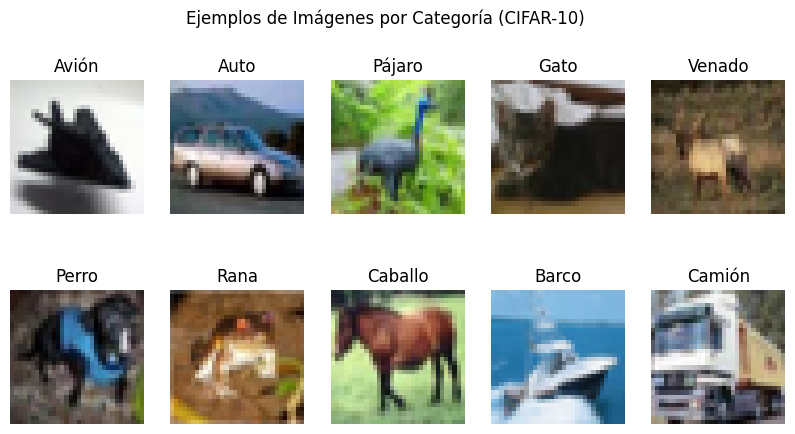

In [4]:
import matplotlib.pyplot as plt

# 📌 Mostrar una imagen por categoría
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.where(y_train == i)[0][0]  # Buscar la primera imagen de la categoría
    ax.imshow(x_train[idx])
    ax.set_title(clases[i])
    ax.axis("off")
plt.suptitle("Ejemplos de Imágenes por Categoría (CIFAR-10)")
plt.show()


📌 Paso 4: Analizar balance de clases y distribución de datos

💡 Explicación:

Para asegurarnos de que el dataset está bien distribuido, vamos a contar cuántas imágenes hay en cada categoría y visualizarlo en un gráfico de barras.

<ipython-input-5-7d72621a76b2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Clase", y="Cantidad", data=df, palette="viridis")


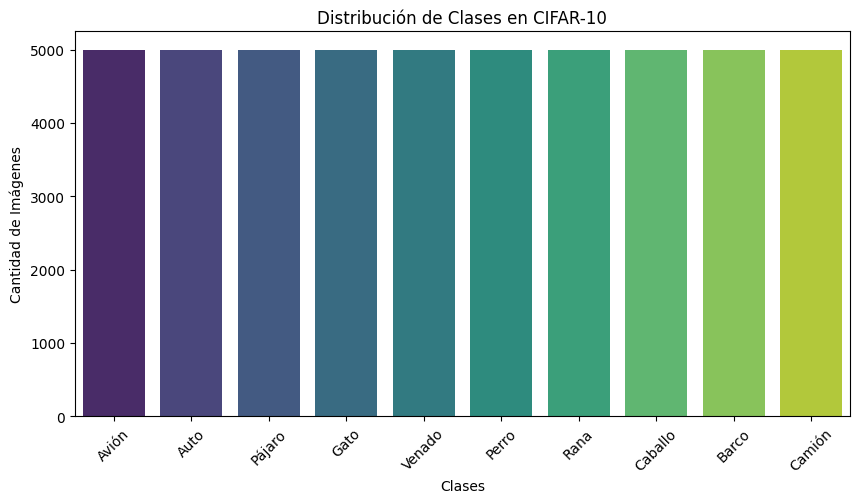

In [5]:
import seaborn as sns
import pandas as pd

# 📌 Contar la cantidad de imágenes por clase
unique, counts = np.unique(y_train, return_counts=True)
df = pd.DataFrame({"Clase": [clases[i] for i in unique], "Cantidad": counts})

# 📌 Mostrar la distribución de clases
plt.figure(figsize=(10, 5))
sns.barplot(x="Clase", y="Cantidad", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribución de Clases en CIFAR-10")
plt.xlabel("Clases")
plt.ylabel("Cantidad de Imágenes")
plt.show()


# **📌 Resumen de la práctica**


✅ Exploramos la estructura del dataset.

✅ Mostramos imágenes de cada categoría.

✅ Analizamos la distribución de clases.



# 📌 **Sección 3: Exploración de un dataset de Detección de Objetos (COCO)**

📌 Paso 1: Extraer y Cargar el Dataset COCO

💡 Explicación:

Antes de analizar los datos, necesitamos extraer el archivo ZIP y buscar el archivo de anotaciones .json de COCO.

In [6]:
import zipfile
import os
from pycocotools.coco import COCO
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt


In [8]:
import zipfile
import os

# 📌 Ruta del dataset
dataset_path = "/content/KIT315_Assignment.v4i.coco.zip"
extract_path = "/content/SC24_dataset1"

# 📌 Extraer el dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extraído en: {extract_path}")

# 📌 Buscar el archivo de anotaciones COCO (.json)
annotations_path = None
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".json"):  # Buscar el archivo JSON
            annotations_path = os.path.join(root, file)
            break

if annotations_path:
    print(f"Archivo de anotaciones encontrado: {annotations_path}")
else:
    print("No se encontró un archivo de anotaciones en el ZIP.")


Dataset extraído en: /content/SC24_dataset1
Archivo de anotaciones encontrado: /content/SC24_dataset1/train/_annotations.coco.json


📌 Paso 2: Explorar la estructura del dataset COCO

💡 Explicación:

El dataset en formato COCO tiene:

✅ "images" → Lista de imágenes con su ID y ruta.

✅ "annotations" → Lista de objetos detectados (bounding boxes).

✅ "categories" → Clases de objetos detectados.

In [9]:
import json

# 📌 Cargar el archivo JSON de anotaciones
with open(annotations_path, "r") as f:
    coco_data = json.load(f)

# 📌 Explorar la estructura de COCO
print("🔹 Número total de imágenes:", len(coco_data["images"]))
print("🔹 Número total de anotaciones:", len(coco_data["annotations"]))
print("🔹 Número total de categorías:", len(coco_data["categories"]))

# 📌 Mostrar las primeras 5 clases
class_names = [cat["name"] for cat in coco_data["categories"]]
print("🔹 Clases en el dataset:", class_names[:5])


🔹 Número total de imágenes: 159
🔹 Número total de anotaciones: 2066
🔹 Número total de categorías: 4
🔹 Clases en el dataset: ['Berries', 'Blackberry', 'Blueberry', 'Raspberry']


📌 Paso 3: Visualizar imágenes con sus anotaciones

💡 Explicación:

Vamos a mostrar una imagen y dibujar sus cajas delimitadoras (bounding boxes) para ver qué objetos detecta.

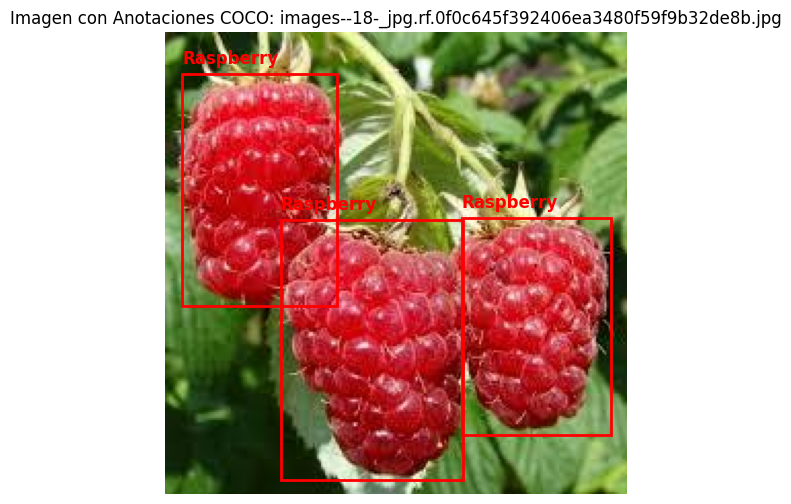

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

#  Seleccionar una imagen aleatoria
img_info = coco_data["images"][1]  # Primera imagen
img_path = os.path.join(os.path.dirname(annotations_path), img_info["file_name"])
img_id = img_info["id"]

# Cargar la imagen
image = Image.open(img_path)

# Obtener anotaciones de esta imagen
annotations = [ann for ann in coco_data["annotations"] if ann["image_id"] == img_id]

# Mostrar la imagen con anotaciones
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.imshow(image)

# Dibujar las cajas delimitadoras
for ann in annotations:
    bbox = ann["bbox"]  # [x, y, width, height]
    category_id = ann["category_id"]
    category_name = next(cat["name"] for cat in coco_data["categories"] if cat["id"] == category_id)

    # Dibujar rectángulo
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor="r", facecolor="none")
    ax.add_patch(rect)
    ax.text(bbox[0], bbox[1] - 5, category_name, color="red", fontsize=12, weight="bold")

plt.axis("off")
plt.title(f"Imagen con Anotaciones COCO: {img_info['file_name']}")
plt.show()


📌 Paso 4: Analizar la distribución de clases

💡 Explicación:

Es importante ver cuántos objetos hay por clase para entender la distribución de datos.

<ipython-input-12-3c9af6fee481>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Clase", y="Cantidad", data=df, palette="coolwarm")


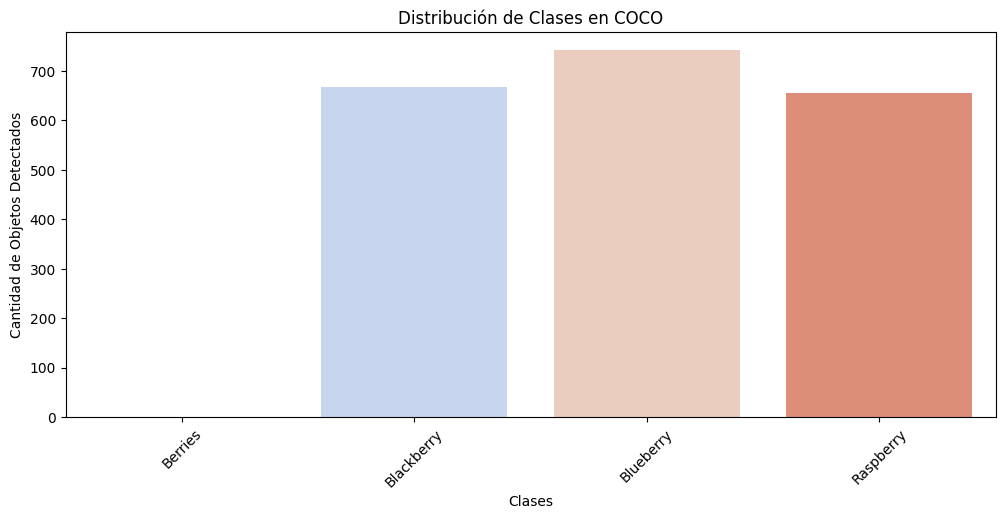

In [12]:
import pandas as pd
import seaborn as sns

# 📌 Contar instancias por clase
category_counts = {cat["name"]: 0 for cat in coco_data["categories"]}
for ann in coco_data["annotations"]:
    category_id = ann["category_id"]
    category_name = next(cat["name"] for cat in coco_data["categories"] if cat["id"] == category_id)
    category_counts[category_name] += 1

# 📌 Convertir a DataFrame para graficar
df = pd.DataFrame({"Clase": list(category_counts.keys()), "Cantidad": list(category_counts.values())})

# 📌 Mostrar la distribución de clases
plt.figure(figsize=(12, 5))
sns.barplot(x="Clase", y="Cantidad", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribución de Clases en COCO")
plt.xlabel("Clases")
plt.ylabel("Cantidad de Objetos Detectados")
plt.show()


# 📌 **Sección 4: Exploración de un dataset de Segmentación (Pascal VOC)**


📂 Pascal VOC es un dataset diseñado para segmentación de imágenes, donde cada objeto en la imagen tiene una máscara de segmentación que indica a qué clase pertenece cada píxel.

📌 Pasos que realizaremos:

1️⃣ Explorar la estructura del dataset.

2️⃣ Cargar y visualizar imágenes con sus máscaras de segmentación.

3️⃣ Analizar la distribución de clases en segmentación.

In [17]:
import os
import tarfile # Import the tarfile module

# 📌 *Paso 1: Extraer el dataset TAR*
dataset_url = "http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar"  # Replace with the actual URL
dataset_path = "/content/VOCtrainval_06-Nov-2007.tar"  # Ruta de tu archivo subido
extract_path = "/content/VOC1Dataset"

# Download the dataset if it doesn't exist
if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    response = requests.get(dataset_url, stream=True)
    with open(dataset_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print("Download complete.")

# Extract the dataset using tarfile
with tarfile.open(dataset_path, "r") as tar: # Open the tar file for reading
    tar.extractall(extract_path) # Extract all contents to the specified path
print(f"Dataset extraído en: {extract_path}")

dataset_path1 = "/content/VOC1Dataset/VOCdevkit/VOC2007"

# 📌 Definir rutas de carpetas clave
image_folder = os.path.join(dataset_path1, "JPEGImages")
mask_folder = os.path.join(dataset_path1, "SegmentationClass")
annotation_folder = os.path.join(dataset_path1, "Annotations")

# 📌 Contar archivos en cada carpeta
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".jpg")])
mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith(".png")])
annotation_files = sorted([f for f in os.listdir(annotation_folder) if f.endswith(".xml")])

# 📌 Mostrar información
print(f"📸 Total de imágenes: {len(image_files)}")
print(f"🎭 Total de máscaras de segmentación: {len(mask_files)}")
print(f"📝 Total de anotaciones XML: {len(annotation_files)}")



Dataset extraído en: /content/VOC1Dataset
📸 Total de imágenes: 5011
🎭 Total de máscaras de segmentación: 422
📝 Total de anotaciones XML: 5011


📌 Paso 2: Cargar y Visualizar una Imagen con su Máscara de Segmentación

💡 Explicación:

Vamos a cargar una imagen y su máscara de segmentación para ver cómo se alinean los objetos en el dataset.

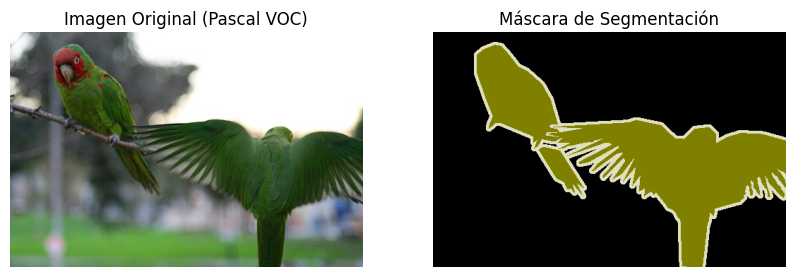

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

# 📌 Seleccionar una imagen y su máscara correspondiente
# Puedes cambiar el índice para ver diferentes imágenes
image_path = os.path.join(image_folder, image_files[181])
mask_path = os.path.join(mask_folder, mask_files[16])

# 📌 Cargar las imágenes
image = Image.open(image_path)
mask = Image.open(mask_path)

# 📌 Mostrar imagen y máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Imagen Original (Pascal VOC)")
ax[0].axis("off")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Máscara de Segmentación")
ax[1].axis("off")
plt.show()


📌 Paso 3: Analizar la Distribución de Clases en Segmentación

💡 Explicación:

Queremos analizar cuántos píxeles pertenecen a cada clase en las máscaras de segmentación.

<ipython-input-19-21dfb4cd574a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Clase (ID)", y="Cantidad de Píxeles", data=df, palette="coolwarm")


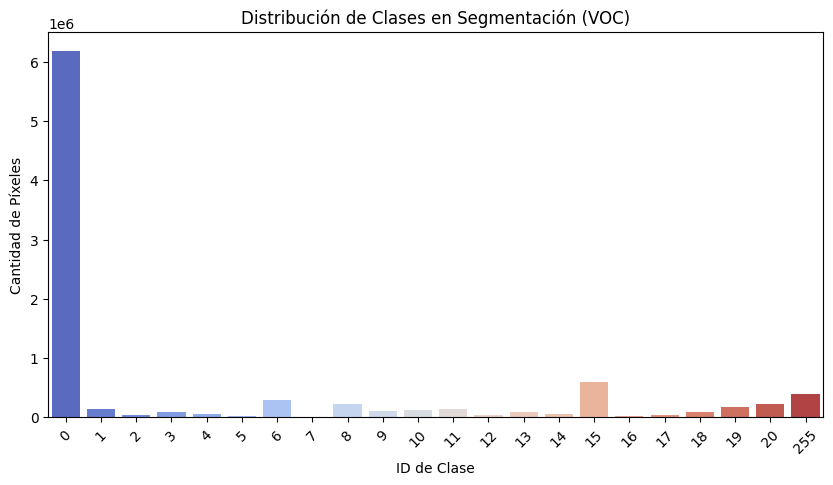

In [19]:
import numpy as np
import seaborn as sns
import pandas as pd

# 📌 Cargar todas las máscaras y contar píxeles por clase
class_counts = {}

for mask_file in mask_files[:50]:  # Analizar solo las primeras 50 máscaras
    mask_path = os.path.join(mask_folder, mask_file)
    mask = np.array(Image.open(mask_path))

    unique, counts = np.unique(mask, return_counts=True)
    for u, c in zip(unique, counts):
        class_counts[u] = class_counts.get(u, 0) + c

# 📌 Convertir en DataFrame para graficar
df = pd.DataFrame({"Clase (ID)": list(class_counts.keys()), "Cantidad de Píxeles": list(class_counts.values())})

# 📌 Mostrar distribución de clases
plt.figure(figsize=(10, 5))
sns.barplot(x="Clase (ID)", y="Cantidad de Píxeles", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribución de Clases en Segmentación (VOC)")
plt.xlabel("ID de Clase")
plt.ylabel("Cantidad de Píxeles")
plt.show()


**Clases:**

Persona: persona

Animal: pájaro, gato, vaca, perro, caballo, oveja.

Vehículo: avión, bicicleta, barco, autobús, coche, moto, tren

Interior: botella, silla, mesa de comedor, planta en maceta, sofá, televisor/monitor

✅ Salida esperada:

Se mostrará un gráfico de barras con la cantidad de píxeles asignados a cada clase en segmentación.

📌 Resumen

✅ Exploramos la estructura del dataset Pascal VOC.

✅ Cargamos y visualizamos imágenes con sus máscaras.

✅ Analizamos la distribución de clases en segmentación.